In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def folder(f_name): #this function creates a folder.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("Tthe folder could not be created!")
folder("./results/cms/")

In [3]:
def find_the_way(path,file_format,con=""):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                if con in file:
                    files_add.append(os.path.join(r, file))  
            
    return files_add

In [4]:
datasets=find_the_way("./results/other/1",".csv")
datasets

['./results/other/1\\ANNP@AD-S1@DI-S1.csv',
 './results/other/1\\ANNP@AD-S1@DI-S2.csv',
 './results/other/1\\ANNP@AD-S2@DI-S1.csv',
 './results/other/1\\ANNP@AD-S2@DI-S2.csv',
 './results/other/1\\ANNP@DI-S1@AD-S1.csv',
 './results/other/1\\ANNP@DI-S1@AD-S2.csv',
 './results/other/1\\ANNP@DI-S2@AD-S1.csv',
 './results/other/1\\ANNP@DI-S2@AD-S2.csv',
 './results/other/1\\CNN@AD-S1@DI-S1.csv',
 './results/other/1\\CNN@AD-S1@DI-S1CB.csv',
 './results/other/1\\CNN@AD-S1@DI-S1CM.csv',
 './results/other/1\\CNN@AD-S1@DI-S2.csv',
 './results/other/1\\CNN@AD-S1@DI-S2CB.csv',
 './results/other/1\\CNN@AD-S1@DI-S2CM.csv',
 './results/other/1\\CNN@AD-S2@DI-S1.csv',
 './results/other/1\\CNN@AD-S2@DI-S1CB.csv',
 './results/other/1\\CNN@AD-S2@DI-S1CM.csv',
 './results/other/1\\CNN@AD-S2@DI-S2.csv',
 './results/other/1\\CNN@AD-S2@DI-S2CB.csv',
 './results/other/1\\CNN@AD-S2@DI-S2CM.csv',
 './results/other/1\\CNN@DI-S1@AD-S1.csv',
 './results/other/1\\CNN@DI-S1@AD-S1CB.csv',
 './results/other/1\\CNN@DI-

In [5]:
mllist=[]
for i in datasets:
    mllist.append(i.split("@")[0][18:])

mllist=list(set(mllist))
mllist =['LSTM', 'XGB', 'CNN', 'LR', 'KNN', 'RF', 'NB', 'MLP', 'SVM', 'DT']

In [6]:
def hm(cm,target_names,say):
    graph_name=f"./results/cms/{say}_confusion matrix.pdf"   
    #plt.figure(figsize = (5,4))
    plt.figure(figsize = (len(datasetnames),int((len(target_names)/5)*4)))
    sns.heatmap(cm,xticklabels=datasetnames, yticklabels=target_names, annot=True, fmt='g')
    plt.ylabel("FEATURES")
    plt.xlabel("DATASETS")
    plt.savefig(graph_name,bbox_inches='tight')#, dpi=400)

    plt.show()
    #print(cm)
    print("\n\n\n") 
    cm=pd.DataFrame(heatmap, columns =datasetnames,index=target_names)
    cm.to_csv(graph_name.replace(".pdf",".csv"))



In [7]:
file_list={"DD11":['./small/AD-S1.csv','./small/DI-S1.csv','./small/DI-S2.csv'],
"DD11T":['./small/DI-S1.csv','./small/AD-S1.csv','./small/AD-S2.csv'],
"DD12":['./small/AD-S1.csv','./small/DI-S2.csv','./small/DI-S1.csv'],
"DD12T":['./small/DI-S2.csv','./small/AD-S1.csv','./small/AD-S2.csv'],
"DD22":['./small/AD-S2.csv','./small/DI-S2.csv','./small/DI-S1.csv'],
"DD22T":['./small/DI-S2.csv','./small/AD-S2.csv','./small/AD-S1.csv'],
"DD21":['./small/AD-S2.csv','./small/DI-S1.csv','./small/DI-S2.csv'],
"DD21T":['./small/DI-S1.csv','./small/AD-S2.csv','./small/AD-S1.csv']}

datasetnames=['DD11', 'DD11T', 'DD12', 'DD12T', 'DD22', 'DD22T', 'DD21', 'DD21T', "MEAN"]

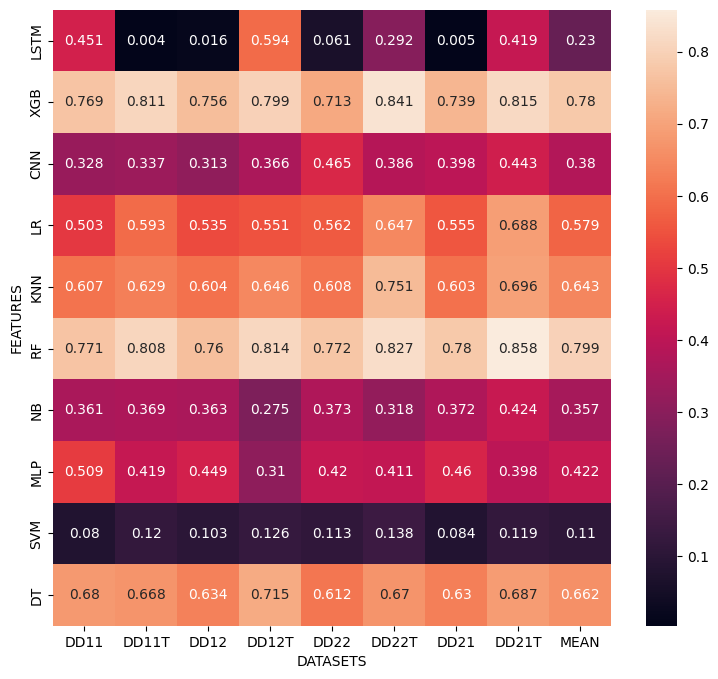

In [8]:
say="ML"
dataset="./results/other/1"
heatmap=[]
target_names=[]
for no in mllist:
    row=[]
    for ii in file_list:
        file=f"{dataset}/{no}@{file_list[ii][0][8:-4]}@{file_list[ii][1][8:-4]}.csv"
        df=pd.read_csv(file)
        row.append(round(df["F1"].mean(),3))
    row.append(round(sum(row)/len(row),3))
    target_names.append(no)
    heatmap.append(row)
hm(heatmap,target_names,say)

TRAIN-TIME


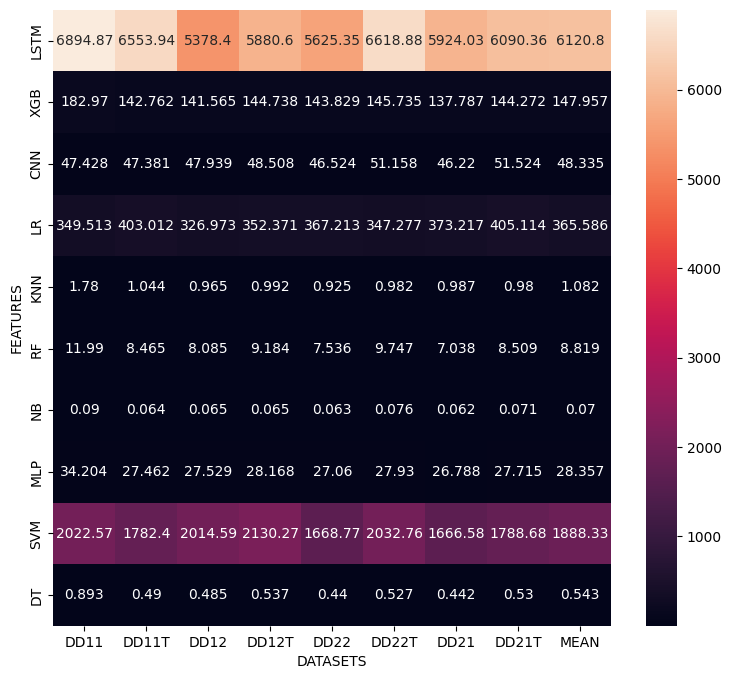





TEST-TIME


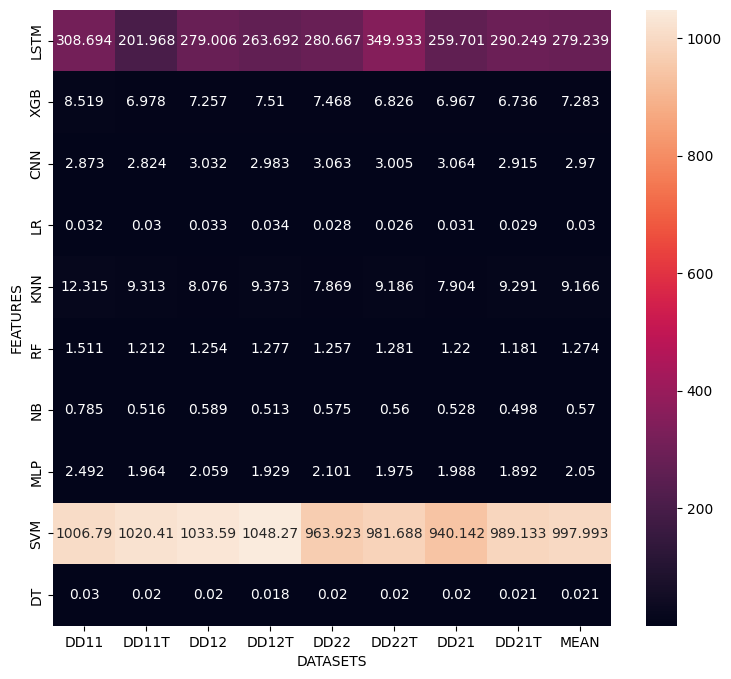

In [9]:
print("TRAIN-TIME")
say="Tra-time"
dataset="./results/other/1"
heatmap=[]
target_names=[]
for no in mllist:
    row=[]
    for ii in file_list:
        file=f"{dataset}/{no}@{file_list[ii][0][8:-4]}@{file_list[ii][1][8:-4]}.csv"
        df=pd.read_csv(file)
        row.append(round(df["tra-T"].mean(),3))
    row.append(round(sum(row)/len(row),3))
    target_names.append(no)
    heatmap.append(row)
hm(heatmap,target_names,say)

print("TEST-TIME")
say="Test-time"
dataset="./results/other/1"
heatmap=[]
target_names=[]
for no in mllist:
    row=[]
    for ii in file_list:
        file=f"{dataset}/{no}@{file_list[ii][0][8:-4]}@{file_list[ii][1][8:-4]}.csv"
        df=pd.read_csv(file)
        row.append(round(df["test-T"].mean(),3))
    row.append(round(sum(row)/len(row),3))
    target_names.append(no)
    heatmap.append(row)
hm(heatmap,target_names,say)

In [10]:
row

[0.03, 0.02, 0.02, 0.018, 0.02, 0.02, 0.02, 0.021, 0.021]